In [142]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('white')
sns.palplot(sns.color_palette())

%matplotlib inline

In [171]:
df = pd.read_csv('./results/mnist_attention.csv')

In [172]:
df.head()

,Iteration,Accuracy,NMI,ARI,Loss
0,0,0.769,0.582,0.582,0.000
1,140,0.805,0.643,0.643,0.079
2,280,0.818,0.667,0.667,0.124
3,420,0.825,0.683,0.683,0.175
4,560,0.826,0.686,0.686,0.222


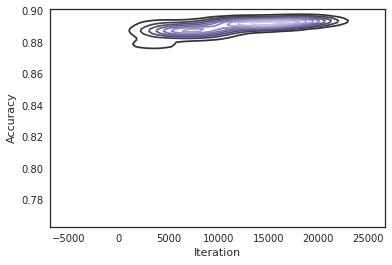

In [173]:
a = sns.kdeplot(data=df['Iteration'], data2=df['Accuracy'], cmap="Purples_d")

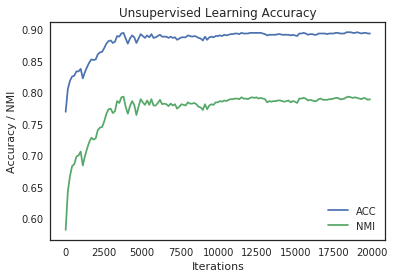

In [174]:
fig, ax = plt.subplots()
ax.plot(df.Iteration, df.Accuracy, label='ACC')
ax.plot(df.Iteration, df.NMI, label='NMI')
plt.xlabel('Iterations')
plt.ylabel('Accuracy / NMI')
plt.title('Unsupervised Learning Accuracy')
ax.legend()
plt.show()
fig.savefig('/home/kumarkm/Dropbox/Courses/Data Mining/ReportTemplate_LaTeX/images/mnist_attention_accuracy.pdf', dpi=1000, bbox_inches='tight')

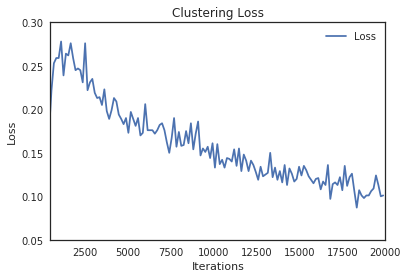

In [182]:
fig, ax = plt.subplots()
ax.plot(df.Iteration, df.Loss, label='Loss')
plt.title('Clustering Loss')
plt.ylim(0.05, 0.3)
plt.xlim(500, 20000)
ax.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
fig.savefig('/home/kumarkm/Dropbox/Courses/Data Mining/ReportTemplate_LaTeX/images/mnist_attention_loss.pdf', dpi=1000, bbox_inches='tight')

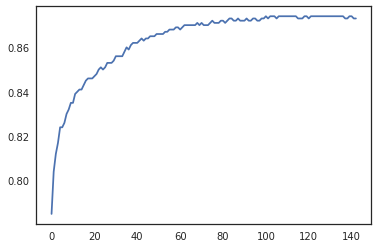

In [35]:
plt.plot(df['Accuracy'])

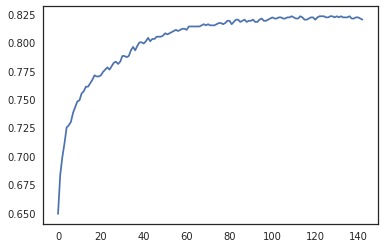

In [36]:
plt.plot(df['NMI'])

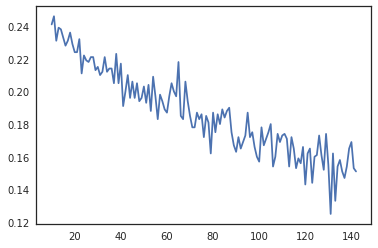

In [37]:
plt.plot(df['Loss'][10:])